<a href="https://colab.research.google.com/github/listguy/ML-Course-ipynb/blob/main/MajorHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
from sklearn.model_selection import train_test_split
randomState=79

params = {'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'axes.titlesize' : 22,
          'axes.labelsize' : 20,
          'legend.fontsize': 18,
          'legend.title_fontsize': 22,
          'figure.titlesize': 24 }
pylab.rcParams.update(params)

## Loading the dataset

In [3]:
# !rm *.csv
from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [4]:
dataset = pd.read_csv(filename)

In [5]:
dataset.shape

(1250, 26)

In [6]:
dataset.spread.value_counts()

-1    646
 1    604
Name: spread, dtype: int64

In [7]:

train_data, test_data = train_test_split(dataset, test_size=0.20, random_state=randomState)

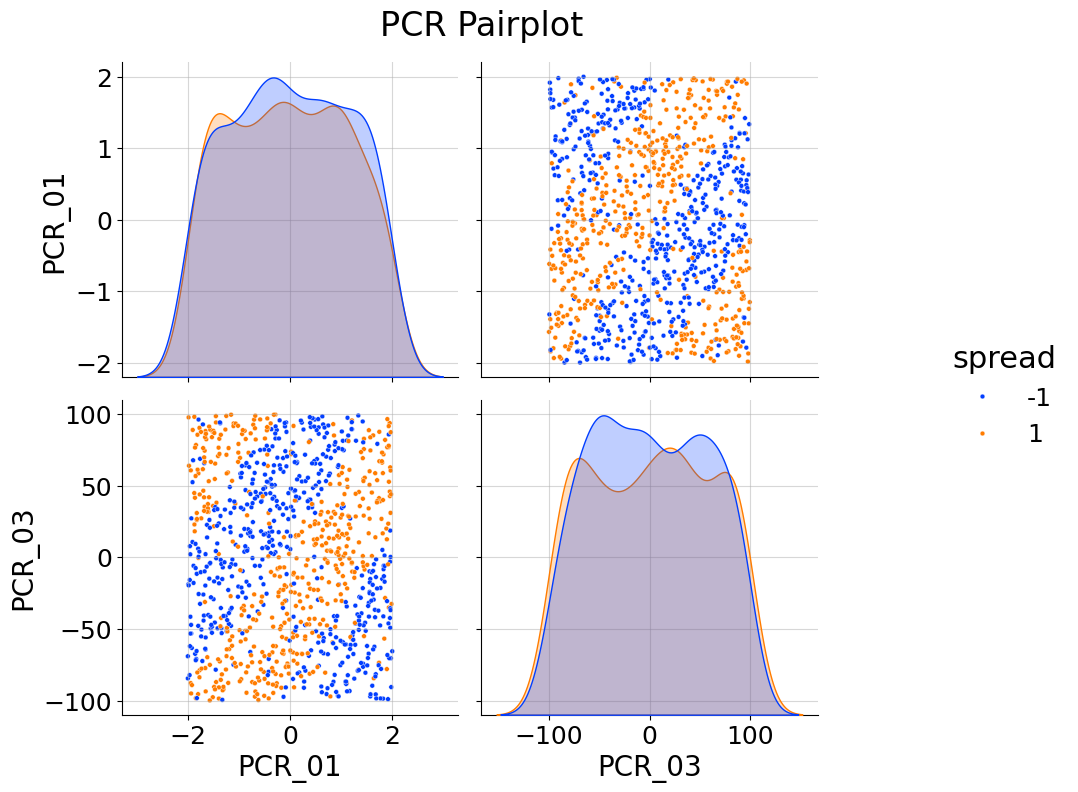

In [8]:
# Q5 - pairplots of PCR
g=sns.pairplot(train_data[['PCR_01','PCR_03', 'spread']], hue='spread', plot_kws={"s": 12}, palette='bright')
g.fig.suptitle("PCR Pairplot", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [9]:
# Q6 - Correlation of PCR and spread

print("Correlation of PCR_01 and spread is: {:.3f}".format(train_data['PCR_01'].corr(train_data['spread'])))
print("Correlation of PCR_03 and spread is: {:.3f}".format(train_data['PCR_03'].corr(train_data['spread'])))

Correlation of PCR_01 and spread is: -0.011
Correlation of PCR_03 and spread is: 0.003


In [ ]:
# Q7 - KNN implementation
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):

  def __init__(self, n_neighbors:int = 3):
    self.n_neighbors = n_neighbors


  def fit(self, X, y):
    self.data = np.copy(X)
    self.labels = np.copy(y)
    return self

  def clean(self, x)
    if x >= self.n_neighbors
      return 0
    return 1


  def predict(self, X):
    distances = cdist(self.data,X) # calculate distances from all neighbors
    nearestNeigborsIndices = np.argpartition(distances, self.n_neighbors)[:,self.n_neighbors] # get indices of n_neighbors nearest neighbors
    nearestLabels = self.labels[nearestNeigborsIndices] # get labels for each indices row
    predictions = np.sign(np.sum(nearestLabels)) # get prediction by majority

    return predictions



